In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
from sklearn.model_selection import train_test_split
!{sys.executable} -m pip install altair vega_datasets
import altair as alt
!pip install pandas-profiling 
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.min_rows = 115
from pandas.plotting import scatter_matrix
from ipywidgets import FloatProgress
from ipywidgets import IntProgress
!pip install ipython-autotime
!pip install ipywidgets --user
%load_ext autotime

time: 0 ns (started: 2022-05-01 08:47:29 -05:00)


Lets read the dataset airbnbNYC_dataset.csv

In [ ]:
 #To read data from dataset 
data = pd.read_csv('airbnbNYC_dataset.csv',low_memory=False)

time: 13.6 s (started: 2022-05-01 08:47:38 -05:00)


Now the dataset is loaded , we will view what data is available in the  columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153254 entries, 0 to 153253
Columns: 106 entries, id to reviews_per_month
dtypes: float64(21), int64(21), object(64)
memory usage: 123.9+ MB
time: 32 ms (started: 2022-05-01 08:47:51 -05:00)


By viewing the data we can see that some columns are numeric like review per month, beds, calculated_host_listings_count_shared_rooms	to name a few,
Some of them are boolean like instant_bookable,is_business_travel_ready,require_guest_phone_verification to name a few and some of them are text like cancellation_policy, neighborhood_overview,description to name a few.

The dataset also has 106 columns and it takes a lot of time to go through all the columns and its data.
When your dataset is very large it is better to do operations on your dataframe instead of the column level.

The below code is used to find the na values of each column

In [ ]:
#To find the missing values in dataset 
pd.DataFrame(data.isna().sum().sort_values(ascending=False))

,0
xl_picture_url,153254
medium_url,153254
thumbnail_url,153254
jurisdiction_names,153201
license,153168
square_feet,152103
monthly_price,138972
weekly_price,136803
notes,91150
host_acceptance_rate,79370


time: 1.03 s (started: 2022-05-01 08:48:24 -05:00)


We will now see the distribution of the host_response_time using the bar graph

In [ ]:
#Data Cleanup - Replacing missing value with most occuring  
data['host_response_time'].isna().sum()
data['host_response_time'].value_counts().plot(kind='bar')
data['host_response_time'] = data['host_response_time'].fillna('within an hour')

time: 390 ms (started: 2022-05-01 08:48:37 -05:00)


It shows that most of the data is towards the 'within an hour'

In [ ]:
#Data Cleanup - Replacing missing value with most occuring 
data['host_is_superhost'].isna().sum()
data['host_is_superhost'].value_counts().plot(kind='bar')
data['host_is_superhost'] = data['host_is_superhost'].fillna('f')

time: 109 ms (started: 2022-05-01 08:48:41 -05:00)


The above plot showa that most of the values are 'f' so we are replacing all the values with the majoritry

In [ ]:
#Replace ' ' or (Blanks) with NaN 
data = data.replace({'':np.nan})
def CalMissing(df):
    MissingDF = 100*data.isna().sum()/len(data.index)
    MissingDF = MissingDF.to_frame()
    MissingDF = MissingDF[MissingDF[0] != 0]
    MissingDF.plot.bar(figsize=(20,20))
    return MissingDF
X = CalMissing(data)

time: 3.2 s (started: 2022-05-01 08:49:10 -05:00)


IN the below code we will remove the dollar sign for all the variable with $ sign

In [ ]:
#Data cleanup - Removing special characters from dataset 
data['host_response_rate']=data['host_response_rate'].str.replace('[%]','')
data['host_acceptance_rate']=data['host_acceptance_rate'].str.replace('[%]','')
data[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']] = data[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[$,,]', '', regex=True)
data['host_response_rate'].apply(lambda x: float(x))
data['host_acceptance_rate'].apply(lambda x: float(x))
data['price'].apply(lambda x: float(x))

C:\Users\sagar\AppData\Local\Temp/ipykernel_31904/4222471276.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['host_response_rate']=data['host_response_rate'].str.replace('[%]','')
C:\Users\sagar\AppData\Local\Temp/ipykernel_31904/4222471276.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['host_acceptance_rate']=data['host_acceptance_rate'].str.replace('[%]','')


0          225.0
1           89.0
2          200.0
3           60.0
4           79.0
5           79.0
6          150.0
7           99.0
8           89.0
9           85.0
10         120.0
11         140.0
12         199.0
13         140.0
14          99.0
15         190.0
16         299.0
17         115.0
18          32.0
19         120.0
20          80.0
21          44.0
22         175.0
23          50.0
24          52.0
25          50.0
26          70.0
27          89.0
28          85.0
29         150.0
           ...  
153224      58.0
153225      80.0
153226     144.0
153227      99.0
153228     324.0
153229      79.0
153230     115.0
153231      95.0
153232     100.0
153233       0.0
153234      43.0
153235      35.0
153236      33.0
153237      50.0
153238      41.0
153239     175.0
153240      38.0
153241     300.0
153242      32.0
153243     139.0
153244     115.0
153245     139.0
153246    4000.0
153247     145.0
153248      50.0
153249     150.0
153250     149.0
153251     188

time: 2.56 s (started: 2022-05-01 08:49:22 -05:00)


We are now using the interquartile range to remove the outliers , we chose interquartile because we wanted to get the most observed data which doesnot have misconfigured values

In [ ]:
# Remove Price outliers
percentile25 = data['price'].astype('float').quantile(0.25)
percentile75 = data['price'].astype('float').quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
data = data[data['price'].astype('float') < upper_limit]
data.shape

(144027, 106)

time: 375 ms (started: 2022-05-01 08:49:48 -05:00)


We will now drop some columns and rows  that are not useful and redundant

In [ ]:
#Drop rows and columns that has missing values and redundant in any of the subset columns
data = data.dropna( how='any',
                    subset=['host_is_superhost', 'host_listings_count','neighbourhood','beds','host_location','reviews_per_month'])
# Drop columns that has only URL
data=data.loc[:, ~data.columns.str.contains("url")]
#Drop columns that has more than 55% missing values 
data = data.drop(data.loc[:,list((100*(data.isnull().sum()/len(data))>=55))].columns, 1)
#Drop redundant columns
data=data.drop(['name','host_name','host_id','host_is_superhost','host_identity_verified','neighbourhood','calendar_updated','host_neighbourhood', 'city','zipcode','market','first_review','last_review','calendar_last_scraped','experiences_offered','last_scraped','scrape_id','id','host_has_profile_pic','latitude','longitude'], axis = 1)

C:\Users\sagar\AppData\Local\Temp/ipykernel_31904/3313257028.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(data.loc[:,list((100*(data.isnull().sum()/len(data))>=55))].columns, 1)


time: 1.3 s (started: 2022-05-01 08:49:54 -05:00)


In [ ]:
#use following function to check missing value %
X = CalMissing(data)

time: 610 ms (started: 2022-05-01 08:49:57 -05:00)


Transforming the boolean values to numericals

In [ ]:
#Mapping columns with Boolean True/False to 1/0
#data['host_is_superhost'] = data['host_is_superhost'].map({'t':1 ,'f':0}) 
#data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'t':1 ,'f':0}) 
#data['host_identity_verified'] = data['host_identity_verified'].map({'t':1 ,'f':0}) 
data['is_location_exact'] = data['is_location_exact'].map({'t':1 ,'f':0})
data['has_availability'] = data['has_availability'].map({'t':1 ,'f':0}) 
data['instant_bookable'] = data['instant_bookable'].map({'t':1 ,'f':0}) 
data['requires_license'] = data['requires_license'].map({'t':1 ,'f':0}) 
data['is_business_travel_ready'] = data['is_business_travel_ready'].map({'t':1 ,'f':0}) 
data['require_guest_profile_picture'] = data['require_guest_profile_picture'].map({'t':1 ,'f':0})
data['require_guest_phone_verification'] = data['require_guest_phone_verification'].map({'t':1 ,'f':0}) 	

time: 579 ms (started: 2022-05-01 08:50:00 -05:00)


There are different types of rooms and we found that usually the type of room is more important attribute to determine the house that we choose to live in. So we tried to understand the statictsics based on the room type

In [ ]:
pd.DataFrame(data.groupby(['room_type']).count())

,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_since,host_location,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,56065,44341,57718,40316,41073,32183,36354,37932,58271,58271,...,58271,58271,58271,58271,58271,58271,58271,58271,58271,58271
Hotel room,686,560,697,441,401,349,375,575,702,702,...,702,702,702,702,702,702,702,702,702,702
Private room,51121,40101,52379,37272,38218,33550,35545,34492,53513,53513,...,53513,53513,53513,53513,53513,53513,53513,53513,53513,53513
Shared room,2475,2040,2537,1795,1779,1581,1649,1793,2581,2581,...,2581,2581,2581,2581,2581,2581,2581,2581,2581,2581


time: 907 ms (started: 2022-05-01 08:51:26 -05:00)


In [ ]:
report = ProfileReport(data,title='Airbnb Pricing',explorative=True)

time: 0 ns (started: 2022-04-24 20:08:04 -05:00)


In [ ]:
report.to_file('Project_report.html')

time: 0 ns (started: 2022-04-24 20:08:04 -05:00)


This has given us the profile of the dataset which is easy to interpret than going through each column

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

time: 1.09 s (started: 2022-04-24 20:08:04 -05:00)


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (data.columns)

Index(['summary', 'space', 'description', 'neighborhood_overview', 'transit',
       'access', 'interaction', 'house_rules', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       '

There are someother states and different spelling to NY so we it consistent all over the dataset

In [ ]:
# To see the NY listings 
import warnings
warnings.filterwarnings("ignore")
data['state']=data['state'].replace(['ny'],'NY')
data['state']=data['state'].replace(['Ny'],'NY')
data['state']=data['state'].replace(['New York'],'NY')
data = data[data['state']=='NY']
data.groupby(['state']).count()

,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_since,host_location,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
state,,,,,,,,,,,,,,,,,,,,,
NY,110323,87021,113307,79801,81447,67645,73899,74771,115043,115043,...,115043,115043,115043,115043,115043,115043,115043,115043,115043,115043


time: 781 ms (started: 2022-04-24 20:08:05 -05:00)


We have measured the distribution og price using a histogram and we can see that it is left skewed

<AxesSubplot:>

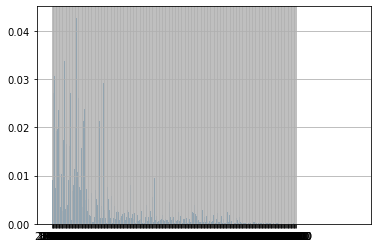

time: 4.69 s (started: 2022-04-24 20:08:06 -05:00)


In [ ]:
%matplotlib inline
data.price.hist(bins=(np.arange(start=0, stop=400)),density=True)

In [ ]:
data.neighbourhood_cleansed.unique()

array(['Midtown', 'Clinton Hill', 'Murray Hill', 'Bedford-Stuyvesant',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope',
       'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea',
       'Crown Heights', 'Park Slope', 'Inwood', 'East Village', 'Harlem',
       'Bushwick', 'Lower East Side', 'Prospect-Lefferts Gardens',
       'Long Island City', 'Greenpoint', 'Kips Bay', 'SoHo',
       'Upper East Side', 'Red Hook', 'Prospect Heights', 'East Harlem',
       'Washington Heights', 'Woodside', 'Flatbush', 'Carroll Gardens',
       'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing', 'Sunnyside',
       'St. George', 'Tribeca', 'Highbridge', 'Morningside Heights',
       'Jamaica', 'Sunset Park', 'Middle Village', 'Ridgewood', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Windsor Terrace',
       'Roosevelt Island', 'Greenwich Village', 'Little Italy',
       'Tompkinsville', 'Gramercy', 'Astoria', 'Eastchester',
       'Kingsbridge', 'Boerum Hill', 'Br

time: 16 ms (started: 2022-04-24 20:08:11 -05:00)


We coverted the host_response_rate to normalize it by dividing it by 100

In [ ]:
data['host_response_rate'] = data['host_response_rate'].astype('float') / 100.0

time: 109 ms (started: 2022-05-01 08:51:42 -05:00)


In [ ]:
data.columns

Index(['summary', 'space', 'description', 'neighborhood_overview', 'transit',
       'access', 'interaction', 'house_rules', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       '

time: 0 ns (started: 2022-04-24 20:08:11 -05:00)


Now we can see that the final list of columns is decreased to 71  and the rows to 115043

In [ ]:
data.shape

(115043, 71)

time: 0 ns (started: 2022-04-24 20:08:11 -05:00)


In [ ]:
# data.drop(data.columns.difference(selected), axis = 1, inplace = True)

time: 0 ns (started: 2022-04-24 20:08:11 -05:00)


In [ ]:
# data = data.sample(n=7000)

time: 0 ns (started: 2022-04-24 20:08:11 -05:00)


array([[<AxesSubplot:xlabel='beds', ylabel='beds'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='beds'>,
        <AxesSubplot:xlabel='accommodates', ylabel='beds'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='beds'>],
       [<AxesSubplot:xlabel='beds', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='accommodates', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='number_of_reviews'>],
       [<AxesSubplot:xlabel='beds', ylabel='accommodates'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='accommodates'>,
        <AxesSubplot:xlabel='accommodates', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='accommodates'>],
       [<AxesSubplot:xlabel='beds', ylabel='review_scores_rating'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='review_scores_rating'>,
        <AxesSubplot:xlabel='

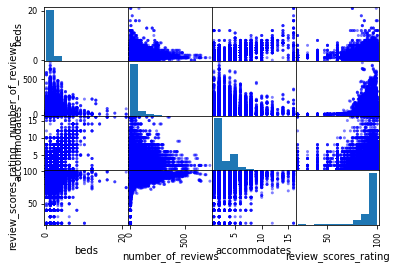

time: 10.7 s (started: 2022-04-24 20:08:11 -05:00)


In [ ]:
%matplotlib inline
plots_attr =['price','beds','number_of_reviews','accommodates','review_scores_rating']
data_scatter = data.reindex(columns=plots_attr)
pd.plotting.scatter_matrix(data_scatter,c='blue')

We tried to  find the coreelation between some of the attributes, and we see that beds and accomodates have a linear relation

In [ ]:
#Convert String columns to Numeric
data[['host_response_rate','price','security_deposit','cleaning_fee','extra_people','host_acceptance_rate']] = data[['host_response_rate','price','security_deposit','cleaning_fee','extra_people','host_acceptance_rate']].apply(pd.to_numeric)
#Replacing the missing values of numerical column with mean 
df_numeric = data.select_dtypes(include=np.number)
for col in df_numeric.columns:
    data[col].fillna(data[col].mean(), inplace=True)

time: 656 ms (started: 2022-05-01 08:52:05 -05:00)


replacing all na columns of the nuric type to the mean of the value

In [ ]:
df_numeric.isna().sum()

host_response_rate                              37170
host_acceptance_rate                            55375
host_listings_count                                 0
host_total_listings_count                           0
is_location_exact                                   0
accommodates                                        0
bathrooms                                          80
bedrooms                                          101
beds                                                0
price                                               0
security_deposit                                34669
cleaning_fee                                    18315
guests_included                                     0
extra_people                                        0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights      

time: 15 ms (started: 2022-05-01 08:52:17 -05:00)


Converting the slected strings values from categorical to numerical using one hot encoding by using pandas dummies

In [ ]:
# One hot encoding by creating dummy variables for categorical column)
categorical_cols = ['property_type','room_type', 'bed_type', 'cancellation_policy','state','host_response_time']  #Property_type increased 35 features
data_cat =data.reindex(columns =categorical_cols)
data_dummies = pd.get_dummies(data_cat, columns = categorical_cols)
data =pd.concat([data,data_dummies],axis=1)

time: 343 ms (started: 2022-05-01 08:52:42 -05:00)


In [ ]:
type(data_dummies)

pandas.core.frame.DataFrame

time: 0 ns (started: 2022-04-24 20:08:22 -05:00)


We will visulaize the disribution density of different room types after converting to numeric using dummies above and the below three charts describe the distribution of the room type in the neighbourhood vs Price

Text(0.5, 1.0, 'Distribution of prices for each neighberhood_group for room_type_Entire home/apt ')

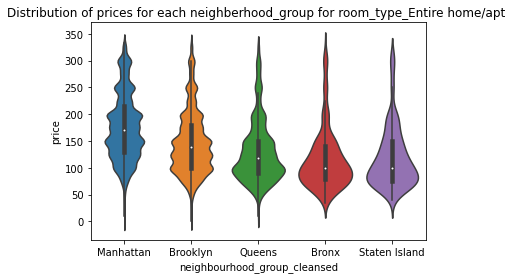

time: 609 ms (started: 2022-04-24 20:08:22 -05:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=data[data['room_type_Entire home/apt']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Distribution of prices for each neighberhood_group for room_type_Entire home/apt ')

Text(0.5, 1.0, 'Distribution of prices for each neighberhood_group for room_type_Hotel room')

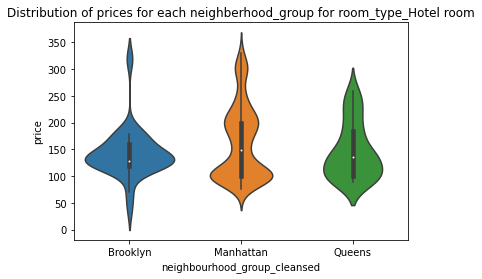

time: 235 ms (started: 2022-04-24 20:08:23 -05:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=data[data['room_type_Hotel room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Distribution of prices for each neighberhood_group for room_type_Hotel room')

Text(0.5, 1.0, 'Distribution of prices for each neighbourhood_group for room_type_Private room')

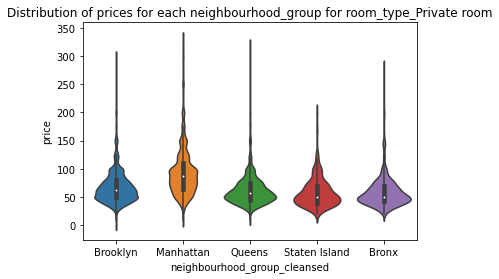

time: 640 ms (started: 2022-04-24 20:08:23 -05:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=data[data['room_type_Private room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Distribution of prices for each neighbourhood_group for room_type_Private room')

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

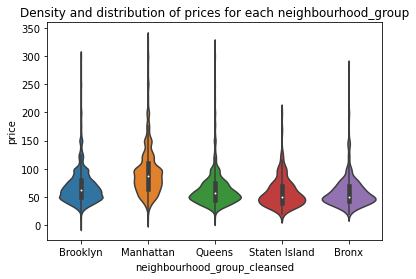

time: 703 ms (started: 2022-04-24 20:08:24 -05:00)


In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=data[data['room_type_Private room']==1], x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood_group')

In [ ]:
#Dropping the duplicate columns after creating dummy variable
drop_columns =['neighbourhood_group_cleansed','property_type','room_type','cancellation_policy','state','host_response_time']
data.reindex(columns=drop_columns)
data = data.drop(columns=drop_columns)

time: 297 ms (started: 2022-05-01 08:52:57 -05:00)


In [ ]:
# To separate the numeric columns in dataset 
df_numeric = data.select_dtypes(include=np.number)

time: 31 ms (started: 2022-05-01 08:53:04 -05:00)


In [ ]:
#To separate the sting column in dataset 
df_str = data.select_dtypes(include=object)

time: 62 ms (started: 2022-04-24 20:08:25 -05:00)


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115043 entries, 0 to 153239
Columns: 101 entries, host_response_rate to host_response_time_within an hour
dtypes: float64(21), int64(25), uint8(55)
memory usage: 47.3 MB
time: 15 ms (started: 2022-04-24 20:08:25 -05:00)


In [ ]:
df_numeric = df_numeric.sample(frac=0.2, replace=True, random_state=1)

time: 31 ms (started: 2022-05-01 08:53:23 -05:00)


In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23009 entries, 129499 to 62888
Columns: 101 entries, host_response_rate to host_response_time_within an hour
dtypes: float64(21), int64(25), uint8(55)
memory usage: 9.5 MB
time: 15 ms (started: 2022-04-24 20:08:25 -05:00)


Spliiting the data into training and testing , we used the traintestsplit from sklearn .
80% of the dta is used for traning and 20% of the data is used for tetsing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop(columns = 'price',axis=1),df_numeric.price, 
                                                    test_size = 0.2,
                                                   random_state = 123)

time: 47 ms (started: 2022-05-01 08:53:27 -05:00)


We will now scale the data so that the variance is 1 and the mean becomes 0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 141 ms (started: 2022-05-01 08:53:31 -05:00)


We will perform PCA so that we will retain 90% variance and this is help us to get the most coreralted features and hence redeuce the number of features to tbe trained for our final model

In [ ]:
#Selection features that exlain atleast 90% of the target variance
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(X_train_scaled)

PCA(n_components=0.9)

time: 422 ms (started: 2022-05-01 08:53:34 -05:00)


In [ ]:
pca.n_components_

57

time: 15 ms (started: 2022-05-01 08:53:48 -05:00)


In [ ]:
X_train  = pca.transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

time: 32 ms (started: 2022-05-01 08:53:53 -05:00)


In [ ]:
#this is to perform PCA on our data 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Component Analysis to reduce variables')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(156.25, 0.5, 'cumulative explained variance')

time: 234 ms (started: 2022-05-01 08:53:57 -05:00)


In [ ]:
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.metrics import *
from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics

time: 204 ms (started: 2022-05-01 08:54:03 -05:00)


We will now model multiple regression models, the below are the models we are trying to use

In [ ]:
models = {'Linear': LinearRegression(),
          'Logistic': LogisticRegression(),
          'Ridge':Ridge(),
          'Lasso':Lasso(), 
          'ElasticNet': ElasticNet(),
          'Linear svr' : LinearSVR(),
          'GBR': ensemble.GradientBoostingRegressor(),
          'GBR tuned':ensemble.GradientBoostingRegressor(learning_rate=0.01, loss='lad', max_depth=4,min_samples_split=2,n_estimators=500),
          'Linear SVR': SVR(C= 10, epsilon= 0.3, gamma= 0.001, kernel= 'rbf')
         }

time: 15 ms (started: 2022-05-01 08:54:06 -05:00)


In [ ]:
results_dict = {}
for model_name, model in models.items(): 
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    tr_mae = median_absolute_error(y_train, y_train_pred)
    valid_mae = median_absolute_error(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
    valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5
    #train_r2 = r2_score(y_train,y_train_pred)
    results_dict[model_name] = [round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3)]
    

results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train MAE", "Validation MAE","Train RMSE", "Valid RMSE"]
results_df

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train MAE,Validation MAE,Train RMSE,Valid RMSE
Linear,26.715,26.251,46.863,46.558
Logistic,25.000,25.000,51.136,50.916
Ridge,26.715,26.252,46.863,46.558
Lasso,27.182,26.452,47.219,46.784
ElasticNet,28.456,27.722,47.661,47.099
Linear svr,24.501,24.205,47.841,48.636
GBR,24.815,25.103,43.626,45.051
GBR tuned,22.161,23.173,45.507,46.424
Linear SVR,24.109,23.708,46.909,46.401


time: 10min 56s (started: 2022-05-01 09:19:46 -05:00)


In [ ]:
results_df.plot.bar(rot=45, title="Model Comparison",xlabel='Estimator',ylabel='Median Absolute Error');
plt.figure(figsize=(15,15))
plt.show();

time: 281 ms (started: 2022-05-01 09:40:19 -05:00)


C:\Users\sagar\AppData\Local\Temp/ipykernel_31904/3341501461.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show();


Looking at the graph we can say most of the models being able to predict the price with a median error around  between 20 to 30 dollars

We have hypertuned the SVR and it has given us to use the below values (C= 10, epsilon= 0.3, gamma= 0.001, kernel= 'rbf')

In [ ]:
model = SVR(C= 10, epsilon= 0.3, gamma= 0.001, kernel= 'rbf')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
tr_mae = median_absolute_error(y_train, y_train_pred)
valid_mae = median_absolute_error(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5        
results_dict['SVR hypertuned'] = [round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3)]
    
results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train MAE", "Validation MAE","Train RMSE","Validation RMSE"]
results_df

,Train MAE,Validation MAE,Train RMSE,Validation RMSE
Linear,26.715,26.251,46.863,46.558
Logistic,25.000,25.000,51.136,50.916
Ridge,26.715,26.252,46.863,46.558
Lasso,27.182,26.452,47.219,46.784
ElasticNet,28.456,27.722,47.661,47.099
Linear svr,24.501,24.205,47.841,48.636
GBR,24.815,25.103,43.626,45.051
GBR tuned,22.161,23.173,45.507,46.424
Linear SVR,24.109,23.708,46.909,46.401
SVR hypertuned,24.109,23.708,46.909,46.401


time: 2min 11s (started: 2022-05-01 09:34:36 -05:00)


We also tried to run the Random Forest regressor and it has given us the best value at depth = 8 with close to 24 as the error which truned out to be a one of the good predictor.

In [ ]:

for i in range(20):
    regr = ensemble.RandomForestRegressor(n_estimators=100, max_depth=i+1, min_samples_split=2,min_samples_leaf=1,
                                          min_weight_fraction_leaf=0,max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0,
                                          bootstrap=True, oob_score=True, n_jobs= None, random_state=None, verbose=0,warm_start=False,
                                          ccp_alpha=0.0, max_samples=None)
    regr.fit(X_train,y_train)
    predicted = regr.predict(X_test)
    print('For depth'+str(i+1)+ ':'+str(median_absolute_error(y_test,predicted)))